In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
path = 'C:/Users/wjssm/Desktop/kaggle/competition/Elo_Merchant_Category_Recommendation/data/'
transaction = pd.read_pickle(path + 'merged_transaction.pkl')
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


# 할부 or not = Category3 C or not
- card_id 별로 할부 결제를 몇 번 했는지 -> 돈 없어도 사고 싶다!
- card_id 별로 할부 수/전체 거래 수

In [4]:
#category_3 Null인 값 D로 바꿈
transaction.loc[transaction.category_3.isnull(), 'category_3'] = 'D'

In [5]:
#고객별 성향이 보인다 -> A가 있는 사람은 대부분 A,B / C는 대부분 B,C
transaction.groupby(['card_id','category_3'])['category_3'].count()

card_id          category_3
C_ID_00007093c1  B             127
                 C              24
C_ID_0001238066  B             109
                 C              36
                 D               4
C_ID_0001506ef0  A              67
                 B               1
C_ID_0001793786  A             242
                 B               5
C_ID_000183fdda  B             109
                 C              41
                 D               5
C_ID_00024e244b  A              65
                 B               5
C_ID_0002709b5a  B              61
                 C              13
                 D               2
C_ID_00027503e2  A              42
C_ID_000298032a  A              31
C_ID_0002ba3c2e  A              73
C_ID_0002c7c2c1  A              73
C_ID_00032df08f  B             139
                 C              14
C_ID_0003754056  A              37
C_ID_000377f6a0  A              27
                 B               1
                 C               1
C_ID_0003be3c83  B         

In [6]:
category3_count = pd.DataFrame(transaction.groupby(['card_id','category_3'])['category_3'].count())
category3_count.columns = ['values']
category3_count.reset_index(inplace = True)
category3_count.head()

,card_id,category_3,values
0,C_ID_00007093c1,B,127
1,C_ID_00007093c1,C,24
2,C_ID_0001238066,B,109
3,C_ID_0001238066,C,36
4,C_ID_0001238066,D,4


In [7]:
category3_count = category3_count.pivot(index = 'card_id', columns='category_3', values='values')
category3_count.fillna(0,inplace=True) #NA는 진짜 값이 0
category3_count.head()

category_3,A,B,C,D
card_id,,,,
C_ID_00007093c1,0.0,127.0,24.0,0.0
C_ID_0001238066,0.0,109.0,36.0,4.0
C_ID_0001506ef0,67.0,1.0,0.0,0.0
C_ID_0001793786,242.0,5.0,0.0,0.0
C_ID_000183fdda,0.0,109.0,41.0,5.0


In [52]:
category3_count.sum()

category_3
A    16333991.0
B    12513700.0
C     1993620.0
dtype: float64

In [13]:
#category3 A를 한 번도 사용하지 않은 사람은 대부분 할부
print(category3_count.loc[category3_count.A.isnull()].sum())
print(1817200.0/1993620.0)

category_3
A           0.0
B    11207208.0
C     1817200.0
D      216934.0
dtype: float64
0.9115077095936036


In [14]:
#category3 할부를 한번도 안 한 사람들은 대부분 category3 : A
print(category3_count.loc[category3_count.C.isnull()].sum())
print(15384980.0/16333991.0)

category_3
A    15384980.0
B      876343.0
C           0.0
D        2534.0
dtype: float64
0.9418996251436651


In [7]:
#train_transaction = pd.merge(train_transaction, train[['card_id','target']], on = 'card_id' )
train_transaction = pd.read_pickle(path + 'train_transaction.pkl')
train_transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33,0.134077
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33,0.134077
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19,0.134077
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33,0.134077
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19,0.134077


In [64]:
train_transaction.groupby('category_3')['target'].mean()

category_3
A   -0.343042
B   -0.583697
C   -0.593040
D   -0.294603
Name: target, dtype: float64

In [18]:
category3_count.head()

category_3,A,B,C,D
card_id,,,,
C_ID_00007093c1,0.0,127.0,24.0,0.0
C_ID_0001238066,0.0,109.0,36.0,4.0
C_ID_0001506ef0,67.0,1.0,0.0,0.0
C_ID_0001793786,242.0,5.0,0.0,0.0
C_ID_000183fdda,0.0,109.0,41.0,5.0


In [9]:
#전체 거래들 중 A와 C의 비율
category3_count['Category3_A_rate'] = category3_count['A']/category3_count[['A','B','C']].sum(axis = 1)
category3_count['Category3_C_rate'] = category3_count['C']/category3_count[['A','B','C']].sum(axis = 1)

In [104]:
train = pd.read_csv(path + 'train2.csv')

### test

In [73]:
x_train = train.drop(['card_id','target'], axis=1)
y_train = train['target']
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [74]:
test = pd.read_csv(path + 'test2.csv')
test = pd.merge(test, category3_count[['Category3_A_rate','Category3_C_rate']], on='card_id')
test.set_index('card_id',inplace = True)
test.head()

,feature_1,feature_2,feature_3,history_month_nunique,history_hour_nunique,history_weekofyear_nunique,history_dayofweek_nunique,history_year_nunique,history_subsector_id_nunique,history_merchant_id_nunique,history_merchant_category_id_nunique,history_city_id_nunique,history_state_id_nunique,history_installments_sum,history_installments_mean,history_installments_std,history_installments_min,history_installments_max,history_installments_percentile_25,history_installments_percentile_50,history_installments_percentile_75,history_purchase_amount_sum,history_purchase_amount_mean,history_purchase_amount_std,history_purchase_amount_min,history_purchase_amount_max,history_purchase_amount_percentile_25,history_purchase_amount_percentile_50,history_purchase_amount_percentile_75,history_purchase_amount_purchase_amount_over_550,history_purchase_date_purchase_date_duration,history_weekend_sum,history_weekend_mean,history_authorized_flag_authorized_flag_cnt_N,history_authorized_flag_authorized_flag_cnt_Y,history_category_1_category_1_cnt_N,history_category_1_category_1_cnt_Y,history_installments_installments_cnt_-1,history_installments_installments_cnt_0,history_installments_installments_cnt_1,history_installments_installments_cnt_10,history_installments_installments_cnt_11,history_installments_installments_cnt_12,history_installments_installments_cnt_2,history_installments_installments_cnt_3,history_installments_installments_cnt_4,history_installments_installments_cnt_5,history_installments_installments_cnt_6,history_installments_installments_cnt_7,history_installments_installments_cnt_8,history_installments_installments_cnt_9,history_installments_installments_cnt_999,history_category_3_category_3_cnt_A,history_category_3_category_3_cnt_B,history_category_3_category_3_cnt_C,history_category_3_category_3_cnt_NULL,history_month_lag_month_lag_cnt_-1,history_month_lag_month_lag_cnt_-10,history_month_lag_month_lag_cnt_-11,history_month_lag_month_lag_cnt_-12,history_month_lag_month_lag_cnt_-13,history_month_lag_month_lag_cnt_-2,history_month_lag_month_lag_cnt_-3,history_month_lag_month_lag_cnt_-4,history_month_lag_month_lag_cnt_-5,history_month_lag_month_lag_cnt_-6,history_month_lag_month_lag_cnt_-7,history_month_lag_month_lag_cnt_-8,history_month_lag_month_lag_cnt_-9,history_month_lag_month_lag_cnt_0,history_category_2_category_2_cnt_1.0,history_category_2_category_2_cnt_2.0,history_category_2_category_2_cnt_3.0,history_category_2_category_2_cnt_4.0,history_category_2_category_2_cnt_5.0,history_category_2_category_2_cnt_NULL,year,month,authorized,not_authorized,authorized_rate,visit_sum,visit_mean,visit_min,visit_max,visit_nunique,visit_size,visit_mode,try_mean,try_std,try_min,try_max,try_nunique,try_size,try_mode,Ref_mean,Ref_std,Ref_min,Ref_max,Ref_nunique,Ref_size,Ref_mode,Category3_A_rate,Category3_C_rate
card_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C_ID_0ab67a22ab,3,3,1,9,17,24,7,1,12,24,16,7,3,141,2.073529,2.061127,1,12,1.0,1.0,2.00,-40.733733,-0.599025,0.192268,-0.743902,0.235676,-0.716855,-0.689206,-0.552033,0.0,23179380,12,0.176471,24,44,45,23,0,0,46,0,0,1,7,2,4,1,7,0,0,0,0,0,46,22,0,4,0,0,0,0,11,9,11,2,11,6,4,0,10,45,0,0,0,0,23,2017.0,4.0,47.0,24.0,0.510638,71,2.629630,1,23,6,27,15,1.392157,0.801958,1,5,4,51,38,245.873239,81.013567,93,423,43,71,6,0.0,0.323944
C_ID_130fd0cbdd,2,3,0,5,18,20,7,2,12,27,16,4,3,83,1.064103,0.405794,1,4,1.0,1.0,1.00,-49.136513,-0.629955,0.154999,-0.731881,0.318818,-0.701723,-0.679288,-0.639367,0.0,34667913,17,0.217949,1,77,76,2,0,0,76,0,0,0,0,1,1,0,0,0,0,0,0,0,76,2,0,0,23,14,11,11,0,0,0,0,0,0,0,17,2,0,0,1,75,0,2,2017.0,1.0,86.0,1.0,0.011628,87,2.416667,1,8,7,36,20,1.011628,0.107833,1,2,2,86,85,130.022989,124.733947,12,474,66,87,6,0.0,0.034483
C_ID_b709037bc5,5,1,1,6,7,7,4,2,6,9,8,4,4,44,3.384615,3.686427,-1,10,1.0,4.0,4.00,4.528840,0.348372,0.906547,-0.536537,2.525866,-0.326466,0.214624,0.410134,0.0,13924886,0,0.000000,4,9,12,1,3,0,1,2,0,0,2,0,

In [75]:
lgb_pred = lgb.predict(test)

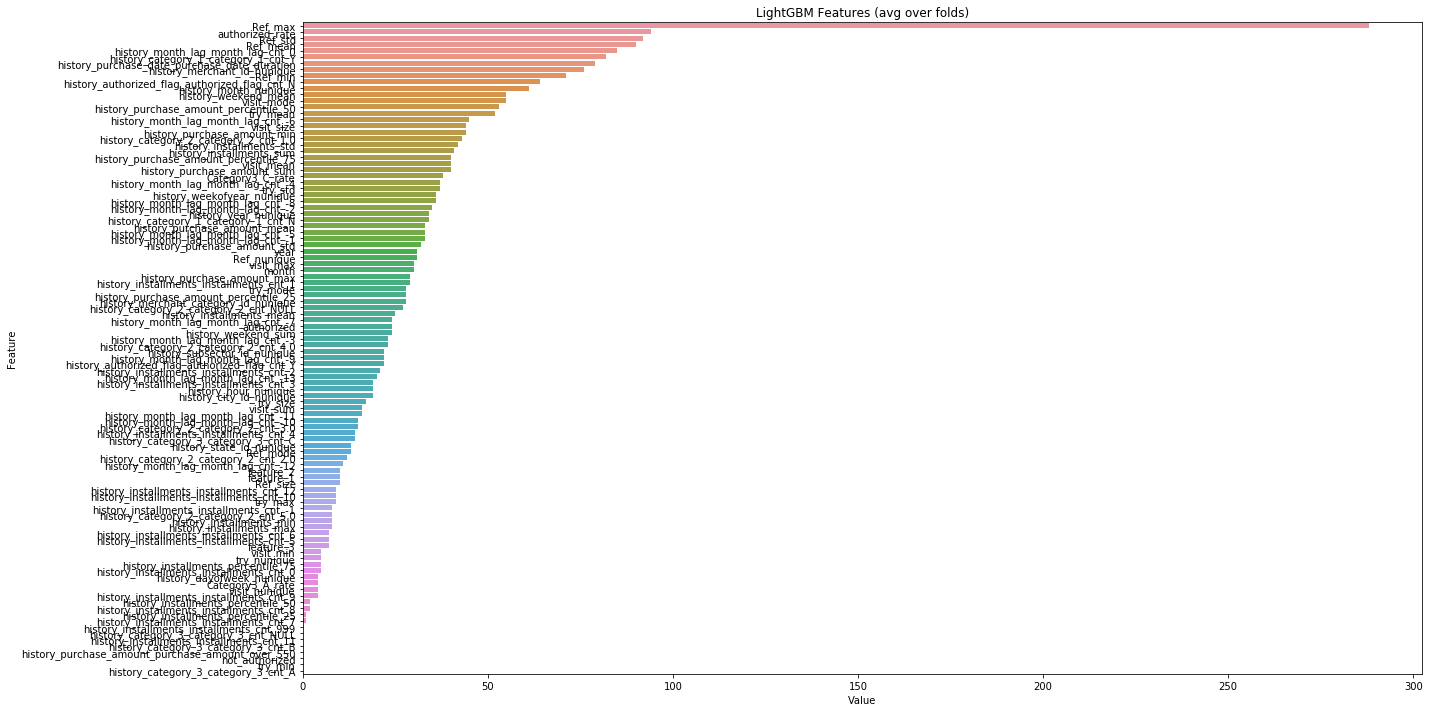

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')


In [80]:
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])
#lgb_pred.to_csv('190218_lgb.csv')
#3.783

# transaction purchase_amount / unique(merchant_id) - good!
- 총 구매 amount / unique(merchant_id)
- 구매 양이 많을 수록 / 가게 수는 적을수록 target이 높지 않을까

In [10]:
purchase_merchant = transaction.groupby('card_id')['purchase_amount'].agg(['sum', 'mean'])
purchase_merchant.columns = ['pur_sum','pur_mean']
purchase_merchant = pd.merge(purchase_merchant,
                                pd.DataFrame(transaction.groupby('card_id')['merchant_id'].count()), on = 'card_id')
purchase_merchant.head()

,pur_sum,pur_mean,merchant_id
card_id,,,
C_ID_00007093c1,-78.173565,-0.517706,151
C_ID_0001238066,-87.297257,-0.585888,148
C_ID_0001506ef0,-36.049233,-0.530136,67
C_ID_0001793786,-37.015633,-0.149861,247
C_ID_000183fdda,-75.428717,-0.486637,155


In [11]:
purchase_merchant['pur_mer_sum'] = purchase_merchant['pur_sum'] / purchase_merchant['merchant_id']
purchase_merchant['pur_mer_mean'] = purchase_merchant['pur_mean'] / purchase_merchant['merchant_id']
purchase_merchant.head()

,pur_sum,pur_mean,merchant_id,pur_mer_sum,pur_mer_mean
card_id,,,,,
C_ID_00007093c1,-78.173565,-0.517706,151,-0.517706,-0.003429
C_ID_0001238066,-87.297257,-0.585888,148,-0.589846,-0.003959
C_ID_0001506ef0,-36.049233,-0.530136,67,-0.538048,-0.007912
C_ID_0001793786,-37.015633,-0.149861,247,-0.149861,-0.000607
C_ID_000183fdda,-75.428717,-0.486637,155,-0.486637,-0.003140


# transaction transaction 수 / unique(merchant_id) 
- 거래수 / unique(merchant_id)

In [12]:
trans_merchant = pd.concat([transaction.groupby(['card_id'])['merchant_id'].nunique(),
                     transaction.groupby('card_id')['merchant_id'].count()], axis = 1)

In [13]:
trans_merchant.columns = ['merchant_count','transaction_count']
trans_merchant.head()

,merchant_count,transaction_count
card_id,,
C_ID_00007093c1,31,151
C_ID_0001238066,90,148
C_ID_0001506ef0,29,67
C_ID_0001793786,150,247
C_ID_000183fdda,84,155


In [14]:
trans_merchant['trans_merchant'] = trans_merchant['transaction_count'] / trans_merchant['merchant_count']

In [105]:
train = pd.merge(train, purchase_merchant[['pur_mer_sum','pur_mer_mean']], on='card_id')

In [111]:
test = pd.read_csv(path + 'test2.csv')
test = pd.merge(test, purchase_merchant[['pur_mer_sum','pur_mer_mean']], on='card_id')
test.set_index('card_id',inplace = True)

### cv

In [106]:
for i, (idx_train, idx_cv) in enumerate(cv.split(train)):
    df_train = train.iloc[idx_train]
    df_cv = train.iloc[idx_cv]
    
    x_train = df_train.drop(['card_id','target'], axis=1)
    y_train = df_train['target']
    
    x_cv = df_cv.drop(['target','card_id'], axis=1)
    y_cv = df_cv['target']
    
    print('-----------LGB-----------')
    lgb.fit(x_train, y_train)
    print("[K = {}] train rmse = {}, cv_rmse = {}".format(i, np.sqrt(np.mean((lgb.predict(x_train) - y_train) ** 2)), np.sqrt(np.mean((lgb.predict(x_cv) - y_cv) ** 2))))
    

-----------LGB-----------
[K = 0] train rmse = 3.4314548513719463, cv_rmse = 3.7168212945266825
-----------LGB-----------
[K = 1] train rmse = 3.4273225679947106, cv_rmse = 3.754442488842663
-----------LGB-----------
[K = 2] train rmse = 3.4330250544187364, cv_rmse = 3.7042759899026505
-----------LGB-----------
[K = 3] train rmse = 3.431787170492569, cv_rmse = 3.7003741237594645
-----------LGB-----------
[K = 4] train rmse = 3.4096563348716904, cv_rmse = 3.7633823395883543


In [107]:
x_train = train.drop(['card_id','target'], axis=1)
y_train = train['target']
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

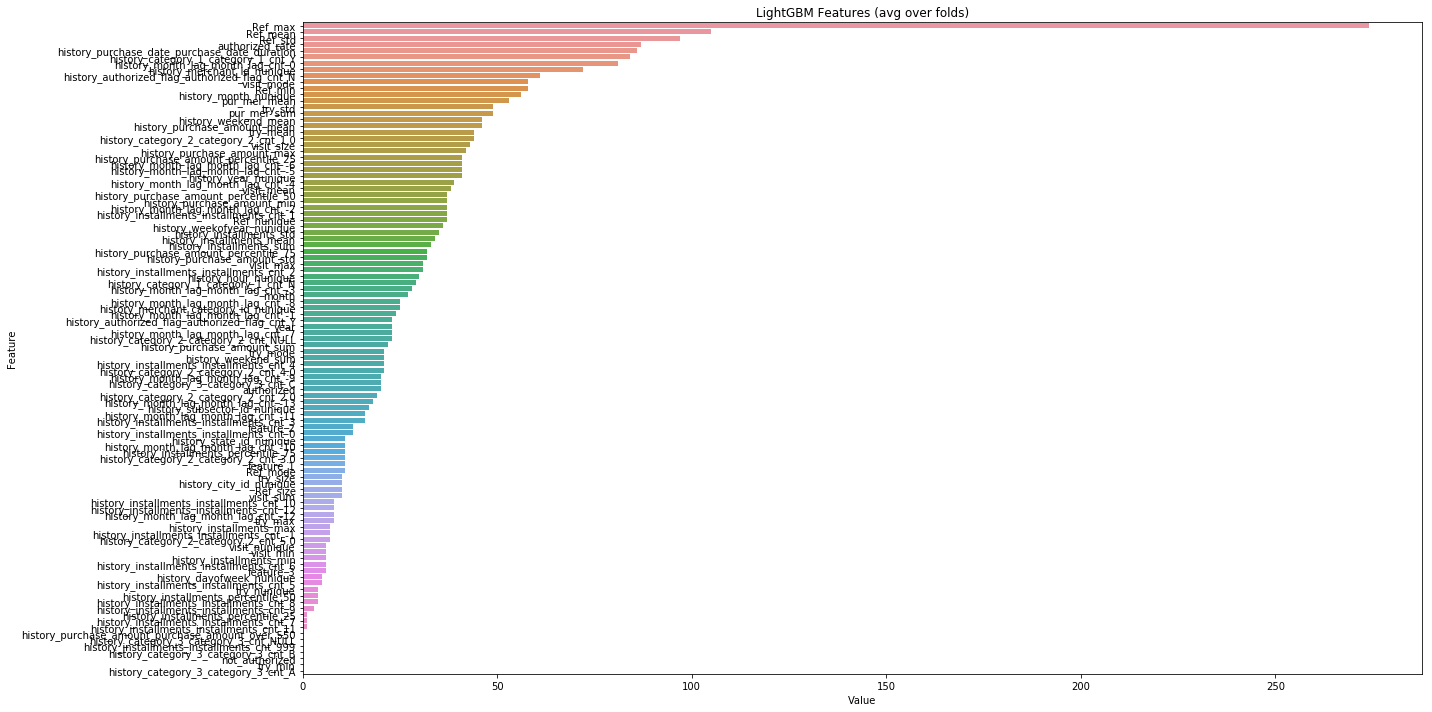

In [108]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [112]:
lgb_pred = lgb.predict(test)
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])


In [113]:
#only pur_mer not category3 feature
#lgb_pred.to_csv('190218_lgb_per_mer.csv')
#3.777

# month_lag이용 - not bad

In [4]:
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


In [5]:
transaction.month_lag.value_counts()

-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     2364790
-6     2050048
-7     1769844
-8     1427846
-9     1234724
-10    1085053
 1     1027617
-11    1007878
 2      935414
-12     791973
-13     689097
Name: month_lag, dtype: int64

In [16]:
by_month_lag = transaction.groupby(['card_id'])['month_lag'].var()

### cv

In [65]:
train = pd.read_csv(path + 'train2.csv')

In [58]:
%who

by_month_lag	 category3_count	 np	 path	 pd	 plt	 purchase_merchant	 train	 trans_merchant	 
transaction	 


In [66]:
train = pd.merge(train, trans_merchant[['trans_merchant']], on='card_id')
train = pd.merge(train, purchase_merchant, on='card_id')
train = pd.merge(train, category3_count, on='card_id')
train = pd.merge(train, by_month_lag, on='card_id')

In [69]:
train.columns

Index(['card_id', 'feature_1', 'feature_2', 'feature_3', 'target',
       'history_month_nunique', 'history_hour_nunique',
       'history_weekofyear_nunique', 'history_dayofweek_nunique',
       'history_year_nunique',
       ...
       'merchant_id', 'pur_mer_sum', 'pur_mer_mean', 'A', 'B', 'C',
       'Category3_A_rate', 'Category3_C_rate', 'mean_by_month',
       'var_by_month'],
      dtype='object', length=117)

In [90]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)

In [91]:
lgb = LGBMRegressor()

In [92]:
for i, (idx_train, idx_cv) in enumerate(cv.split(train)):
    df_train = train.iloc[idx_train]
    df_cv = train.iloc[idx_cv]
    
    x_train = df_train.drop(['card_id','target'], axis=1).iloc[:,:102]
    x_train_p = df_train.drop(['card_id','target'], axis=1)
    y_train = df_train['target']
    
    x_cv = df_cv.drop(['target','card_id'], axis=1).iloc[:,:102]
    x_cv_p = df_cv.drop(['target','card_id'], axis=1)
    y_cv = df_cv['target']
    
    print('-----------original-----------')
    lgb.fit(x_train, y_train)
    print("[K = {}] train rmse = {}, cv_rmse = {}".format(i, np.sqrt(np.mean((lgb.predict(x_train) - y_train) ** 2)), np.sqrt(np.mean((lgb.predict(x_cv) - y_cv) ** 2))))
    print('-----------add features-----------')
    lgb.fit(x_train_p, y_train)
    print("[K = {}] train rmse = {}, cv_rmse = {}".format(i, np.sqrt(np.mean((lgb.predict(x_train_p) - y_train) ** 2)), np.sqrt(np.mean((lgb.predict(x_cv_p) - y_cv) ** 2))))
    

-----------original-----------
[K = 0] train rmse = 3.4294740200344114, cv_rmse = 3.7143626441991775
-----------add features-----------
[K = 0] train rmse = 3.4253539778530646, cv_rmse = 3.7203504215633267
-----------original-----------
[K = 1] train rmse = 3.422465053159456, cv_rmse = 3.7633509403369723
-----------add features-----------
[K = 1] train rmse = 3.4122031383403506, cv_rmse = 3.7515432794837236
-----------original-----------
[K = 2] train rmse = 3.4352304208596283, cv_rmse = 3.7102718981587333
-----------add features-----------
[K = 2] train rmse = 3.430156116657895, cv_rmse = 3.700607705226732
-----------original-----------
[K = 3] train rmse = 3.43344271825645, cv_rmse = 3.705913399609291
-----------add features-----------
[K = 3] train rmse = 3.4272703043675223, cv_rmse = 3.6943255703999283
-----------original-----------
[K = 4] train rmse = 3.4148462276522835, cv_rmse = 3.7704592832469066
-----------add features-----------
[K = 4] train rmse = 3.404652461493068, cv_rms

### test

In [93]:
test = pd.read_csv(path + 'test2.csv')

In [94]:
test = pd.merge(test, trans_merchant[['trans_merchant']], on='card_id')
test = pd.merge(test, purchase_merchant, on='card_id')
test = pd.merge(test, category3_count, on='card_id')
test = pd.merge(test, by_month_lag, on='card_id')

In [95]:
lgb = LGBMRegressor()

In [96]:
x_train = train.drop(['card_id','target'], axis=1)
y_train = train['target']
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [98]:
import seaborn as sns

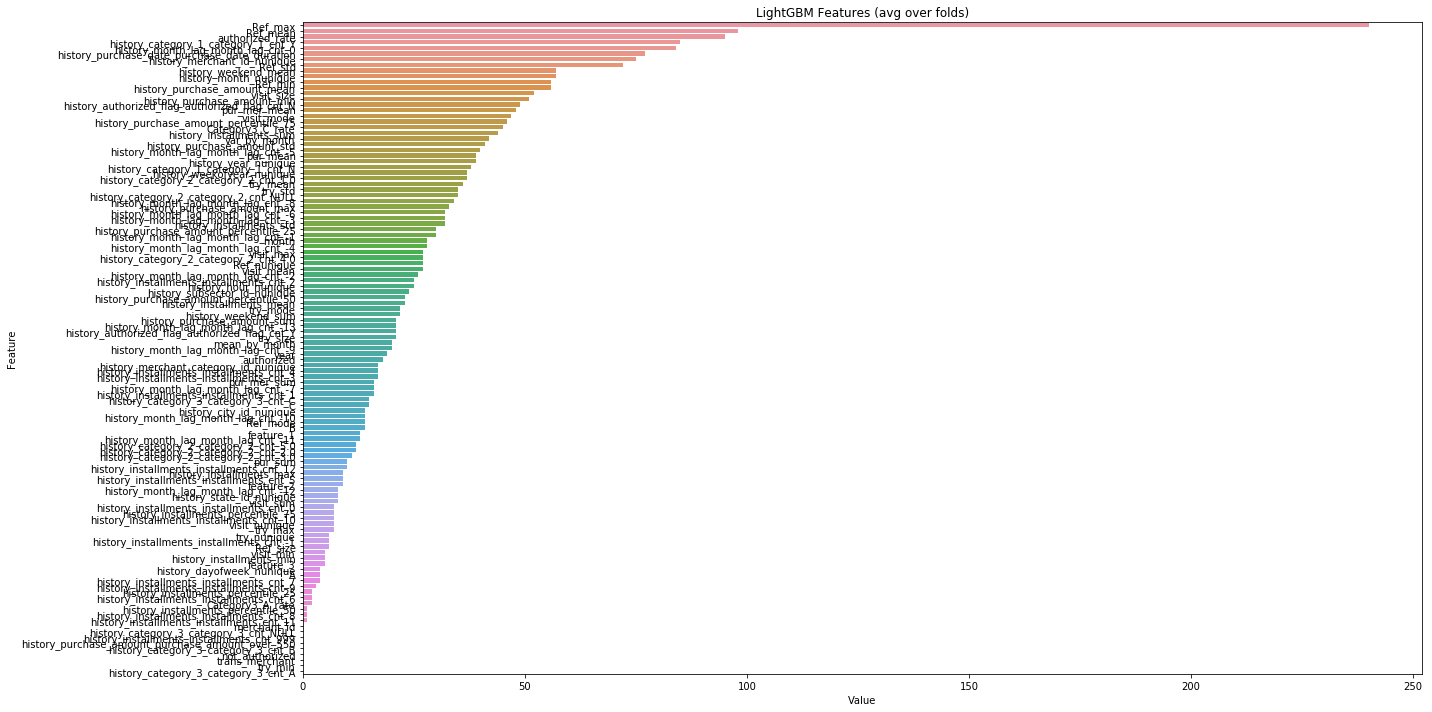

In [99]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [108]:
test=test.set_index('card_id')

In [109]:
lgb_pred = lgb.predict(test)
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])
#lgb_pred.to_csv('190220_lgb.csv') - 3.767

In [17]:
%who

by_month_lag	 category3_count	 np	 path	 pd	 plt	 purchase_merchant	 trans_merchant	 transaction	 



In [29]:
by_month_lag = pd.DataFrame(by_month_lag)
by_month_lag.head()

,month_lag
card_id,
C_ID_00007093c1,12.576247
C_ID_0001238066,2.856702
C_ID_0001506ef0,18.406277
C_ID_0001793786,7.060696
C_ID_000183fdda,4.269962


In [20]:
category3_count[['Category3_A_rate','Category3_C_rate']].head()

category_3,Category3_A_rate,Category3_C_rate
card_id,,
C_ID_00007093c1,0.000000,0.158940
C_ID_0001238066,0.000000,0.248276
C_ID_0001506ef0,0.985294,0.000000
C_ID_0001793786,0.979757,0.000000
C_ID_000183fdda,0.000000,0.273333


In [22]:
purchase_merchant[['pur_mer_sum','pur_mer_mean']].head()

,pur_mer_sum,pur_mer_mean
card_id,,
C_ID_00007093c1,-0.517706,-0.003429
C_ID_0001238066,-0.589846,-0.003959
C_ID_0001506ef0,-0.538048,-0.007912
C_ID_0001793786,-0.149861,-0.000607
C_ID_000183fdda,-0.486637,-0.003140


In [41]:
trans_merchant = pd.DataFrame(trans_merchant)
trans_merchant.head()

,merchant_count,transaction_count,trans_merchant
card_id,,,
C_ID_00007093c1,31,151,4.870968
C_ID_0001238066,90,148,1.644444
C_ID_0001506ef0,29,67,2.310345
C_ID_0001793786,150,247,1.646667
C_ID_000183fdda,84,155,1.845238


In [45]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
train.set_index('card_id', inplace=True)
test.set_index('card_id', inplace=True)

In [47]:
train = train.join(by_month_lag)
train = train.join(category3_count[['Category3_A_rate','Category3_C_rate']])
train = train.join(purchase_merchant[['pur_mer_sum','pur_mer_mean']])
train = train.join(trans_merchant['trans_merchant'])

In [48]:
train.head()

,first_active_month,feature_1,feature_2,feature_3,target,month_lag,Category3_A_rate,Category3_C_rate,pur_mer_sum,pur_mer_mean,trans_merchant
card_id,,,,,,,,,,,
C_ID_92a2005557,2017-06,5,2,1,-0.820283,7.477132,0.985866,0.000000,-0.646978,-0.002286,2.367521
C_ID_3d0044924f,2017-01,4,1,0,0.392913,14.945909,0.000000,0.203390,-0.602141,-0.001691,2.405405
C_ID_d639edf6cd,2016-08,2,2,0,0.688056,16.980973,1.000000,0.000000,-0.678812,-0.015428,3.142857
C_ID_186d6a6901,2017-09,4,3,0,0.142495,4.588067,0.000000,0.086420,-0.644592,-0.007674,1.473684
C_ID_cdbd2c0db2,2017-11,1,3,0,-0.159749,2.242533,0.000000,0.047619,-0.408416,-0.002417,1.647059


In [50]:
test = test.join(by_month_lag)
test = test.join(category3_count[['Category3_A_rate','Category3_C_rate']])
test = test.join(purchase_merchant[['pur_mer_sum','pur_mer_mean']])
test = test.join(trans_merchant['trans_merchant'])

In [51]:
test.head()

,first_active_month,feature_1,feature_2,feature_3,month_lag,Category3_A_rate,Category3_C_rate,pur_mer_sum,pur_mer_mean,trans_merchant
card_id,,,,,,,,,,
C_ID_0ab67a22ab,2017-04,3,3,1,7.070825,0.0,0.323944,-0.598745,-0.008433,2.629630
C_ID_130fd0cbdd,2017-01,2,3,0,17.407645,0.0,0.034483,-0.633117,-0.007277,2.416667
C_ID_b709037bc5,2017-08,5,1,1,3.809524,0.0,0.833333,0.313932,0.020929,1.363636
C_ID_d27d835a9f,2017-12,2,1,0,2.027778,0.0,0.352941,-0.539844,-0.014996,1.090909
C_ID_2b5e3df5c2,2015-12,5,1,1,22.167016,0.0,0.060870,0.320727,0.002765,2.188679


In [52]:
train.to_csv('sm_feature_train.csv')
test.to_csv('sm_feature_test.csv')

# category_1 이용 - category2가  NA인지 아닌지 


In [4]:
len(transaction.city_id.unique())

308

In [13]:
transaction.authorized_flag.value_counts()

Y    28558483
N     2516909
Name: authorized_flag, dtype: int64

In [5]:
transaction.category_1.value_counts()

N    28928267
Y     2147125
Name: category_1, dtype: int64

In [12]:
transaction.loc[transaction.category_1 == 'Y'].describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2147125.0,2.147125e+06,2.147125e+06,2.147125e+06,2.147125e+06,0.0,2147125.0,2.147125e+06
mean,-1.0,1.909399e+00,6.928823e+02,-3.876229e+00,-4.134305e-01,NaN,-1.0,2.020342e+01
std,0.0,2.933223e+00,1.980809e+02,3.455989e+00,2.176215e+01,NaN,0.0,1.078952e+01
min,-1.0,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.468928e-01,NaN,-1.0,-1.000000e+00
25%,-1.0,1.000000e+00,5.740000e+02,-6.000000e+00,-7.251194e-01,NaN,-1.0,8.000000e+00
50%,-1.0,1.000000e+00,7.550000e+02,-3.000000e+00,-6.943150e-01,NaN,-1.0,2.700000e+01
75%,-1.0,1.000000e+00,8.390000e+02,-1.000000e+00,-5.591065e-01,NaN,-1.0,2.900000e+01
max,-1.0,9.990000e+02,8.910000e+02,2.000000e+00,3.155499e+04,NaN,-1.0,4.100000e+01


In [15]:
transaction.loc[transaction.category_1 == 'N', 'city_id'].value_counts()

 69     5164357
 19     1222038
 158    1197975
 17     1037014
 331     755843
 143     722766
 88      705629
 137     648030
 333     592498
 87      478907
 212     438339
-1       430848
 57      405746
 25      385072
 149     381828
 233     381790
 117     342914
 160     340749
 213     269413
 277     263918
 286     247907
 76      230472
 4       229075
 107     225811
 53      223987
 291     222095
 20      220767
 140     208190
 344     187530
 161     182424
         ...   
 81        8938
 54        8877
 32        8821
 326       8538
 235       8438
 293       8314
 327       8116
 112       7921
 84        7868
 237       7825
 254       7608
 227       7590
 71        7293
 204       7036
 221       6547
 306       6390
 130       6101
 205       5760
 122       5755
 89        5036
 215       4936
 178       4675
 263       4245
 315       4107
 207       4057
 319       1702
 92         783
 273        643
 316        164
 185         50
Name: city_id, Length: 3

In [20]:
transaction.loc[transaction.category_1 == 'Y', 'category_2'].value_counts()

Series([], Name: category_2, dtype: int64)

In [16]:
transaction.loc[transaction.category_1 == 'N', 'category_2'].value_counts()

1.0    16235441
3.0     4201320
5.0     3985181
4.0     2796643
2.0     1092198
Name: category_2, dtype: int64

In [17]:
#all NA
transaction.loc[transaction.category_1 == 'Y', 'category_2'].value_counts()

Series([], Name: category_2, dtype: int64)

In [18]:
transaction.loc[transaction.category_1 == 'Y', 'state_id'].value_counts()

-1    2147125
Name: state_id, dtype: int64

In [19]:
transaction.loc[transaction.category_1 == 'N', 'state_id'].value_counts()

 9     11302027
 16     2283185
 15     2237559
 5      1775282
 19     1292267
 20     1220150
 22     1037014
 21      989749
 4       904352
 7       690054
 11      678032
 13      673438
-1       617484
 3       581128
 12      412670
 18      407015
 2       399542
 1       265661
 10      239736
 23      219080
 24      218777
 14      181839
 8       170047
 17      124589
 6         7590
Name: state_id, dtype: int64

# category_2이용